In [1]:
import cv2

#Part 1

Reading an image

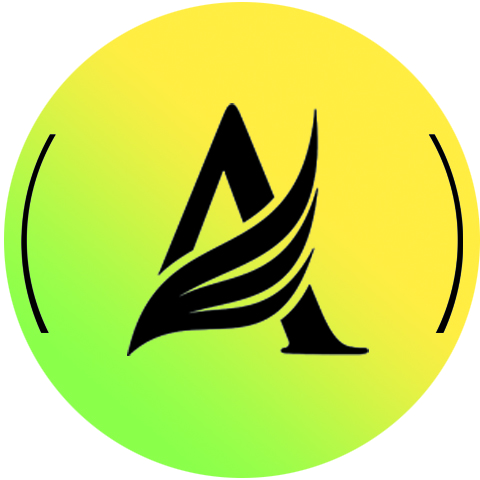

In [6]:
# Open an image file
img = cv2.imread('/content/top copy.jpg')


from google.colab.patches import cv2_imshow
cv2_imshow(img)


Converting image to Grayscale

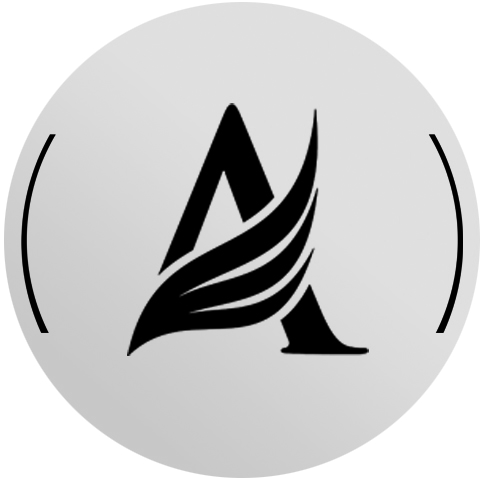

In [11]:
# Convert image to grayscale
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

cv2_imshow(gray_img)

Resizing image

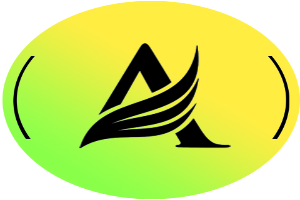

In [12]:
new_width = 300
new_height = 200
new_size = (new_width, new_height)

#resize the image
resized = cv2.resize(img,new_size)
cv2_imshow(resized)

Cropping an image

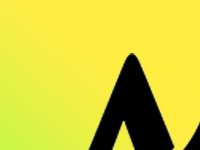

In [14]:
# Define the ROI (top-left corner x, y, width, height)
x, y, w, h = 100, 50, 200, 150

# Crop the image using array slicing
cropped_image = img[y:y+h, x:x+w]

# Display the original and cropped images
cv2_imshow(cropped_image)

#Part 2

**Converting world coordinates to pixel coordinates**

Converting world coordinates to pixel coordinates in OpenCV typically involves a process called perspective transformation. This transformation is particularly useful when you want to map points from a plane in the real world to the image plane.

In [15]:
import cv2
import numpy as np

# Define the points in world coordinates (e.g., real-world units like meters)
world_points = np.array([
    [0, 0],
    [1, 0],
    [1, 1],
    [0, 1]
], dtype=np.float32)

# Define the corresponding points in pixel coordinates (e.g., image coordinates)
pixel_points = np.array([
    [100, 100],
    [200, 100],
    [200, 200],
    [100, 200]
], dtype=np.float32)

# Calculate the perspective transformation matrix
transformation_matrix = cv2.getPerspectiveTransform(world_points, pixel_points)

# Define a world coordinate point to be converted
world_point = np.array([[0.5, 0.5]], dtype=np.float32)

# Convert the world coordinate to pixel coordinate
world_point = np.array([world_point])  # cv2.perspectiveTransform expects an array of points
pixel_point = cv2.perspectiveTransform(world_point, transformation_matrix)

print("World Coordinate:", world_point)
print("Pixel Coordinate:", pixel_point)


World Coordinate: [[[0.5 0.5]]]
Pixel Coordinate: [[[150. 150.]]]


#Part 3 Basic Transformation

Translation

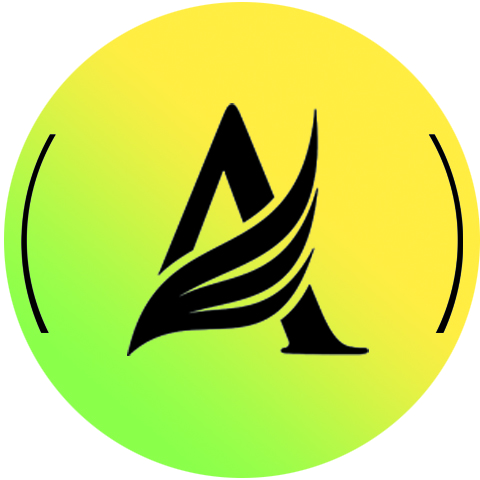

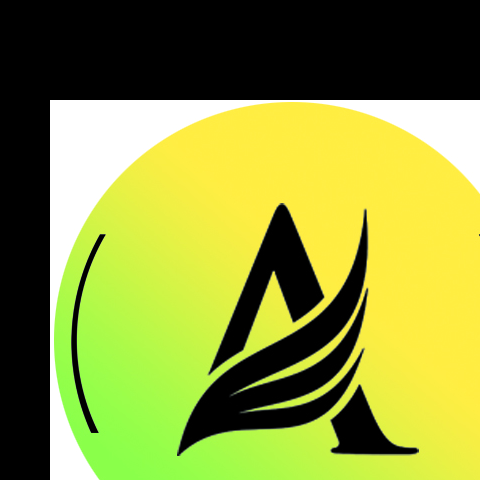

In [17]:
# Define the translation amounts
tx = 50  # Shift along the x-axis
ty = 100 # Shift along the y-axis

# Create the translation matrix
translation_matrix = np.float32([
    [1, 0, tx],
    [0, 1, ty]
])

# Get the dimensions of the image
height, width = img.shape[:2]

# Apply the translation to the image
translated_image = cv2.warpAffine(img, translation_matrix, (width, height))

# Display the original and translated images
cv2_imshow(img)
cv2_imshow(translated_image)

In [ ]:
Rotation

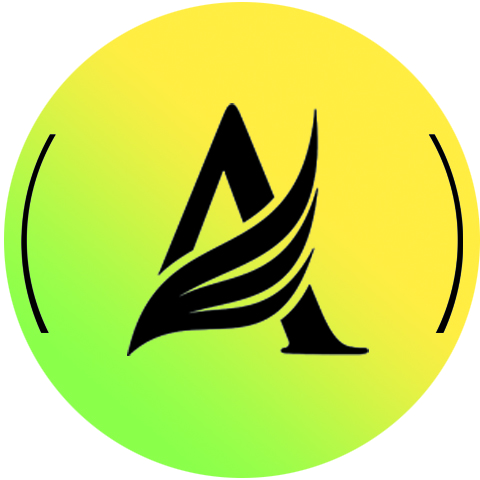

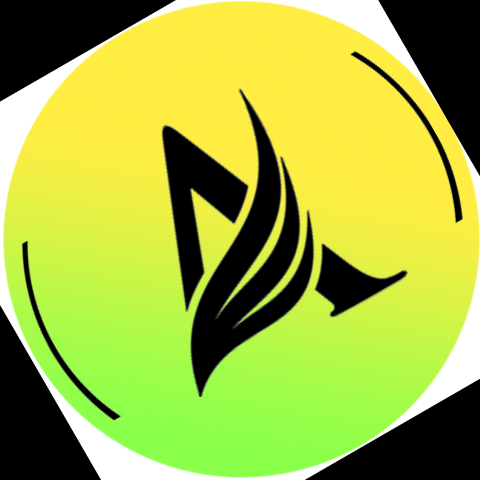

In [20]:
# Get the dimensions of the image
(height, width) = img.shape[:2]

# Define the center of the image
center = (width // 2, height // 2)

# Define the rotation angle
angle = 30  # degrees

# Define the scale (1.0 means no scaling)
scale = 1.0

# Create the rotation matrix
rotation_matrix = cv2.getRotationMatrix2D(center, angle, scale)

# Apply the rotation to the image
rotated_image = cv2.warpAffine(img, rotation_matrix, (width, height))

# Display the original and rotated images
cv2_imshow(img)
cv2_imshow(rotated_image)


Scaling

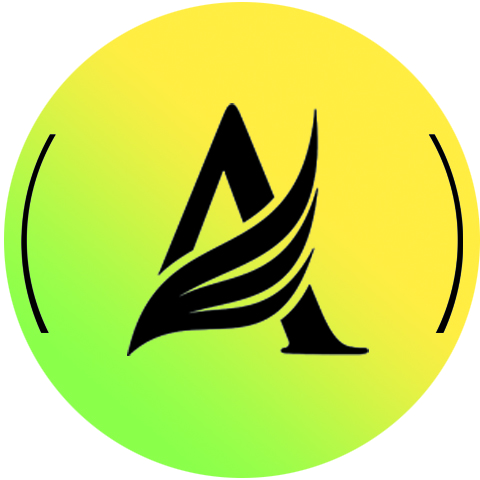

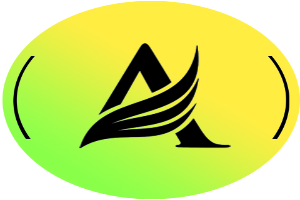

In [22]:
# Define the new dimensions
new_width = 300
new_height = 200

# Resize the image
resized_image = cv2.resize(img, (new_width, new_height))

# Display the original and resized images
cv2_imshow(img)
cv2_imshow(resized_image)

#Part 4

Affine transformation

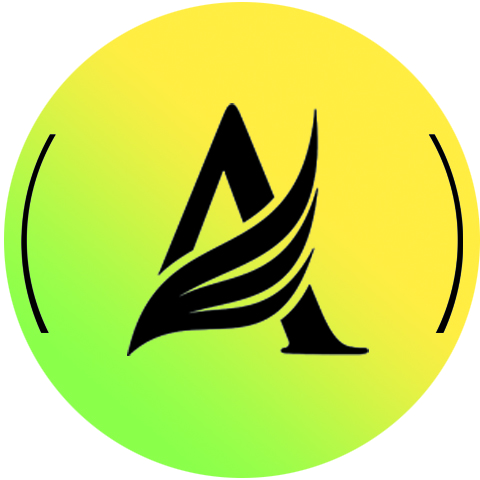

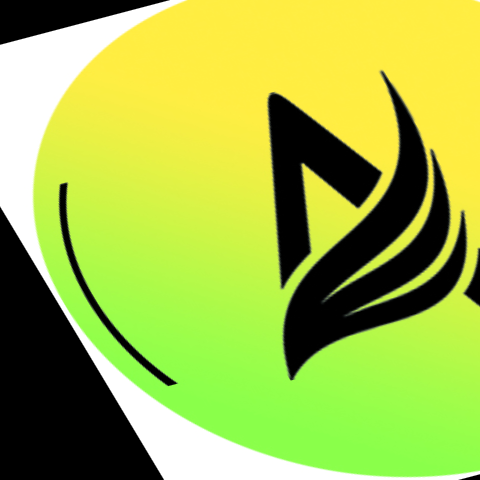

In [24]:
# Get the dimensions of the image
rows, cols, ch = img.shape

# Define the points in the source image
# Points should be chosen such that they form a triangle
src_points = np.float32([[50, 50], [200, 50], [50, 200]])

# Define the points in the destination image
# Points should be chosen to correspond to the source points
dst_points = np.float32([[10, 100], [200, 50], [100, 250]])

# Calculate the affine transformation matrix
affine_matrix = cv2.getAffineTransform(src_points, dst_points)

# Apply the affine transformation to the image
transformed_image = cv2.warpAffine(img, affine_matrix, (cols, rows))

# Display the original and transformed images
cv2_imshow(img)
cv2_imshow(transformed_image)

**Similarity transformation**

Used when you need to resize objects along with rotation and translation, such as in image registration, pattern recognition, and computer vision tasks where scale invariance is important.Uniform scaling is done

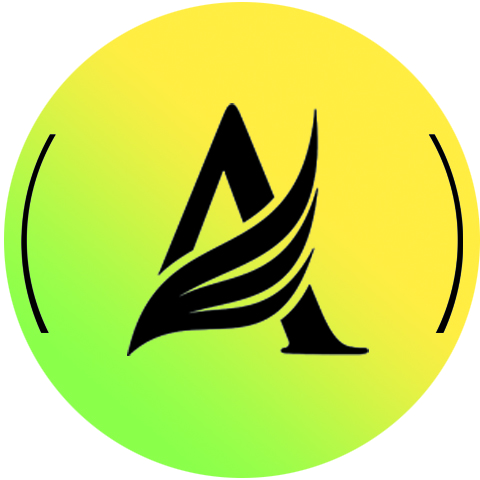

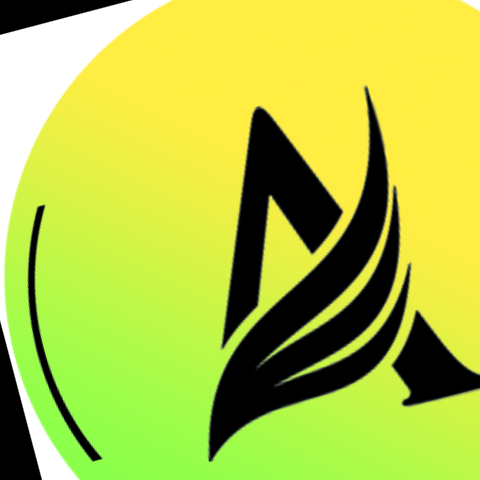

In [25]:

# Get the dimensions of the image
rows, cols, ch = img.shape

# Define the points in the source image
# Points should be chosen such that they form a triangle
src_points = np.float32([[50, 50], [200, 50], [50, 200]])

# Define the points in the destination image
# Points should be chosen to correspond to the source points
dst_points = np.float32([[10, 100], [200, 50], [100, 250]])

# Calculate the similarity transformation matrix
similarity_matrix, inliers = cv2.estimateAffinePartial2D(src_points, dst_points)

# Apply the similarity transformation to the image
transformed_image = cv2.warpAffine(img, similarity_matrix, (cols, rows))

# Display the original and transformed images
cv2_imshow(img)
cv2_imshow(transformed_image)

**Euclidean transformation**
Used when you need to move and rotate objects while maintaining their original size and shape. Examples include object tracking, robotic motion, and path planning. No scaling

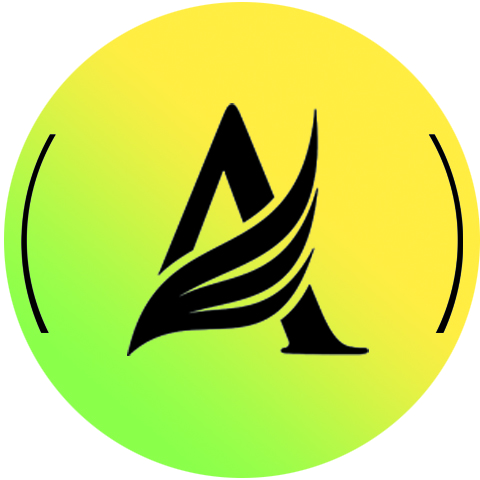

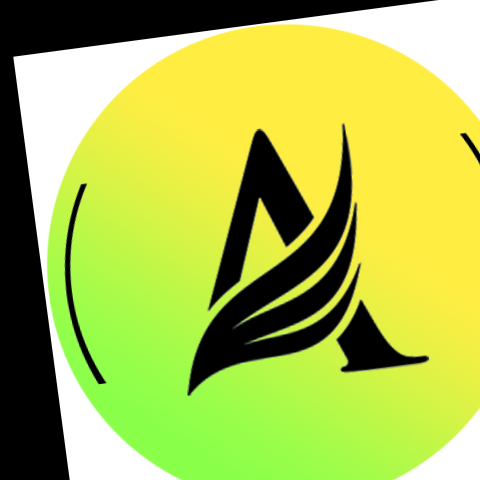

In [27]:
# Get the dimensions of the image
rows, cols, ch = img.shape

# Define the points in the source image
src_points = np.float32([[50, 50], [200, 50], [50, 200]])

# Define the points in the destination image
dst_points = np.float32([[70, 100], [220, 80], [70, 250]])

# Calculate the similarity transformation matrix
similarity_matrix, _ = cv2.estimateAffinePartial2D(src_points, dst_points)

# Apply the similarity transformation to the image
transformed_image = cv2.warpAffine(img, similarity_matrix, (cols, rows))

# Display the original and transformed images
cv2_imshow(img)
cv2_imshow(transformed_image)
